In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [71]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
df1 = pd.DataFrame(iris_data["data"], columns=iris_data["feature_names"])
y = pd.DataFrame(iris_data["target"], columns=["target"])

X = df1
df2 =df1
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [73]:
df1["sepal width (cm)"] = df1["sepal width (cm)"].apply(lambda x : x**2)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,12.25,1.4,0.2
1,4.9,9.00,1.4,0.2
2,4.7,10.24,1.3,0.2
3,4.6,9.61,1.5,0.2
4,5.0,12.96,1.4,0.2
...,...,...,...,...
145,6.7,9.00,5.2,2.3
146,6.3,6.25,5.0,1.9
147,6.5,9.00,5.2,2.0
148,6.2,11.56,5.4,2.3


In [74]:
df2 = pd.concat([df2,y], axis=1)
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,12.25,1.4,0.2,0
1,4.9,9.00,1.4,0.2,0
2,4.7,10.24,1.3,0.2,0
3,4.6,9.61,1.5,0.2,0
4,5.0,12.96,1.4,0.2,0
...,...,...,...,...,...
145,6.7,9.00,5.2,2.3,2
146,6.3,6.25,5.0,1.9,2
147,6.5,9.00,5.2,2.0,2
148,6.2,11.56,5.4,2.3,2


In [75]:
df2.corrwith(df2["target"])
# target는 명목 관계이나 계산할때 등간으로 봄 

sepal length (cm)    0.782561
sepal width (cm)    -0.440544
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
dtype: float64

In [76]:
# for a,i in enumerate(iris_data):
#     y['target'] = y['target'].replace(a,i)

# for a,i in zip(y["target"].unique(),iris_data["target_names"]):
#     y[y == a] = i
# y

In [77]:
setosa = []
versicolor = []
virginica = []
for i in df2["target"]:
    if i ==0:
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i ==1:
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    elif i ==2:
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
        
df2["is setosa"] = setosa
df2["is versicolor"] = versicolor
df2["is virginica"] = virginica


In [78]:
df2.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is setosa,is versicolor,is virginica
sepal length (cm),1.000000,-0.130954,0.871754,0.817941,7.825612e-01,-0.717416,7.939552e-02,0.638020
sepal width (cm),-0.130954,1.000000,-0.444615,-0.384785,-4.405436e-01,0.610352,-4.576605e-01,-0.152692
petal length (cm),0.871754,-0.444615,1.000000,0.962865,9.490347e-01,-0.922765,2.017545e-01,0.721011
petal width (cm),0.817941,-0.384785,0.962865,1.000000,9.565473e-01,-0.887344,1.178988e-01,0.769445
target,0.782561,-0.440544,0.949035,0.956547,1.000000e+00,-0.866025,4.038222e-17,0.866025
is setosa,-0.717416,0.610352,-0.922765,-0.887344,-8.660254e-01,1.000000,-5.000000e-01,-0.500000
is versicolor,0.079396,-0.457661,0.201754,0.117899,4.038222e-17,-0.500000,1.000000e+00,-0.500000
is virginica,0.638020,-0.152692,0.721011,0.769445,8.660254e-01,-0.500000,-5.000000e-01,1.000000


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(112, 4)
(38, 4)
(112, 1)
(38, 1)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,9.00,4.2,1.5
92,5.8,6.76,4.0,1.2
112,6.8,9.00,5.5,2.1
2,4.7,10.24,1.3,0.2
141,6.9,9.61,5.1,2.3
...,...,...,...,...
9,4.9,9.61,1.5,0.1
103,6.3,8.41,5.6,1.8
67,5.8,7.29,4.1,1.0
117,7.7,14.44,6.7,2.2


## EDA

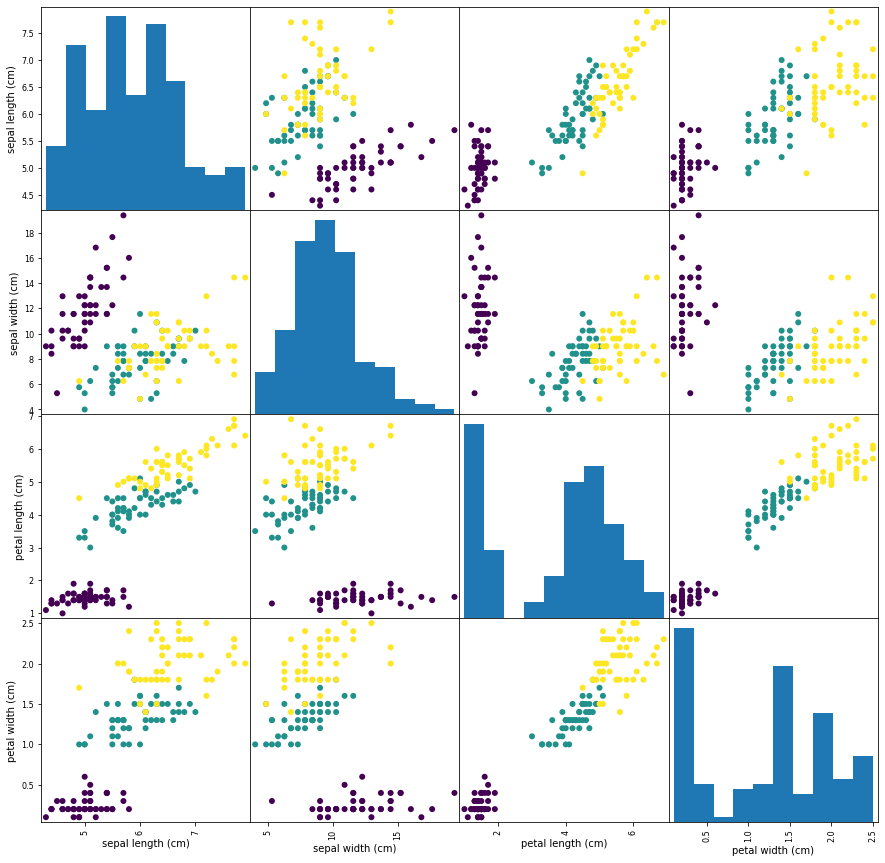

In [82]:
pd.plotting.scatter_matrix(X, figsize=(15,15), marker="o", c= np.array(y), alpha =1)
plt.show()

In [83]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
model.score(X_test, y_test)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9473684210526315

In [84]:
metrics.accuracy_score(prediction,y_test)

0.9473684210526315

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

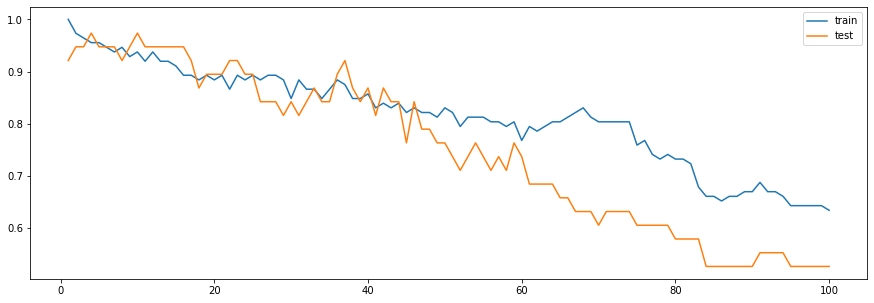

In [85]:
train_list =[]
test_list =[]

for i in range(1,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    train_list.append(model.score(X_train, y_train))
    test_list.append(model.score(X_test, y_test))

plt.figure(figsize=(15,5))
plt.plot(range(1,101), train_list, label ="train")
plt.plot(range(1,101), test_list, label ="test")
plt.legend(loc = "upper right")
plt.show()